# Project Title: Beta Bank Analysis  

Introduction: An anaylsis will be conducted for Beta Bank. Beta Bank is losing clientel and wants to determine which clientel they will be losing soon. Data is provided on clients' past behaviors and termination of contracts with the bank. The aim of the project will be to build a model with the maximum possible F1 score of at least 0.59. 
The following steps will be taken to achieve this aim: 
Once the data has been cleaned up, then dataframes will split both dataframe into training, validation and test sets. Then, a variety of machine learning classifier models including logistic reagression, decsion tree, and random forest will be used.In addition, I will examine the balance of classes in the target and develop models without balancing the classes. F1 scores and accuracy scores will be examined. The goal will be to achieve the highest possible F1 score with accuracy as a consideration. Next, downsampling and upsampling functions will be used to balance the numbers of postive and negative target classes, training and validation models will be used to preprocess data sets and choose the model with the highest F1 score. Once I have obtained the model's final F1 score using the testing set and I will find the AUC-ROC score. The AUC-ROC will need to be over 0.50. A sanity check will be conducted to ensure that the final model achieves this result not by random chance.   


In [1]:
#Importing libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,roc_curve, confusion_matrix
from sklearn.preprocessing import OrdinalEncoder,StandardScaler 
from sklearn.utils import shuffle 


In [2]:
#Importing data 
df = pd.read_csv('/datasets/Churn.csv')

In [3]:
#Exploring dataframes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


<AxesSubplot:>

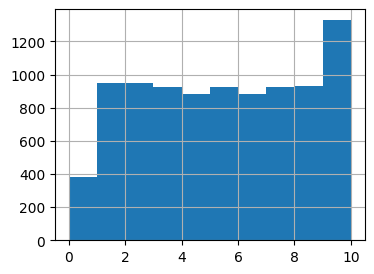

In [4]:
df.Tenure.hist(figsize=(4,3))

In examining the distribution for the missing values in the tenure column it is clear that the distribution is abnormal. It is extremely uniform. This would suggest that filling in missing values with the median should take care of the issue with the missing values during data preparation. 

Description of the data: 

Features:

RowNumber — data string index
CustomerId — unique customer identifier
Surname — surname
CreditScore — credit score
Geography — country of residence
Gender — gender
Age — age
Tenure — period of maturation for a customer’s fixed deposit (years)
Balance — account balance
NumOfProducts — number of banking products used by the customer
HasCrCard — customer has a credit card
IsActiveMember — customer’s activeness
EstimatedSalary — estimated salary

Target:

Exited — сustomer has left

Observations on the data: In examining the dataset initially it appears that some existing values exist for the Tenure data. This will need to be explored a little further. In addition the categorical values need to be changed to lowercase.  

In [5]:
#Checking for missing values 
df.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

Actually based on the fact that running a quick histogram shows that tenure has an abnormal distribution and that the values should be filled with median. Not really necessary to illustrate that 11% of the values are missing from the tenure column. 

# Data Preparation 

In [6]:
# Fixing Categorical Values 
df.columns=df.columns.str.lower()

#Check coulmn renamed correctly
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rownumber        10000 non-null  int64  
 1   customerid       10000 non-null  int64  
 2   surname          10000 non-null  object 
 3   creditscore      10000 non-null  int64  
 4   geography        10000 non-null  object 
 5   gender           10000 non-null  object 
 6   age              10000 non-null  int64  
 7   tenure           9091 non-null   float64
 8   balance          10000 non-null  float64
 9   numofproducts    10000 non-null  int64  
 10  hascrcard        10000 non-null  int64  
 11  isactivemember   10000 non-null  int64  
 12  estimatedsalary  10000 non-null  float64
 13  exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [7]:
#Cleaning up the missing values 
df.tenure = df.tenure.fillna(df.tenure.median().astype('int'))
df.isna().sum()

rownumber          0
customerid         0
surname            0
creditscore        0
geography          0
gender             0
age                0
tenure             0
balance            0
numofproducts      0
hascrcard          0
isactivemember     0
estimatedsalary    0
exited             0
dtype: int64

In [8]:
#Remove unhelpful features (identifiers) and set the target 
features = df.drop(['rownumber','customerid','surname', 'exited'], axis=1)
target = df.exited 

In [9]:
#Checking for duplicates 
df.duplicated().sum()

0

Data Description: No duplicate rows are present and missing values have been eliminated. The features and targets have collected into ther own dataframe/series. Next, the dataframe will be processed using one-hot encoding for a logistic regression model and separately using ordinal encoding for testing decession tress and random forest classifier models.

# Preparing Data for Logistic Regression 

In [10]:
#Creating one-hot encoded dataframe
features_df = pd.get_dummies(features, drop_first=True)

In [11]:
#Split data 
x_train, features_test_df,y_train, target_test = train_test_split(features_df,target,test_size=0.2,random_state=123)

features_train_df,features_valid_df,target_train,target_valid = train_test_split(x_train,y_train, test_size=0.25,random_state=123)

In [12]:
#Creating numeric features 
numeric = ['creditscore','age','tenure','balance','numofproducts','estimatedsalary']

scaler = StandardScaler()
scaler.fit(features_train_df[numeric])

features_train_df[numeric] = scaler.transform(features_train_df[numeric])
features_valid_df[numeric] = scaler.transform(features_valid_df[numeric])
features_test_df[numeric] = scaler.transform(features_test_df[numeric])


/tmp/ipykernel_79/979623550.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train_df[numeric] = scaler.transform(features_train_df[numeric])
/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/tmp/ipykernel_79/979623550.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [13]:
features_train_df.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,geography_Germany,geography_Spain,gender_Male
8189,0.652468,-1.698690,1.096509,-1.213083,0.781092,1,0,-0.535390,0,0,1
8845,0.796864,0.002583,-1.450269,0.886952,-0.920634,1,1,1.637287,1,0,0
1165,0.621526,0.947735,0.005033,1.258423,0.781092,0,0,1.681465,1,0,0
1742,-0.698668,1.420312,-1.450269,0.022130,-0.920634,0,0,0.672609,1,0,0
1139,0.776236,1.703857,-1.450269,0.538309,-0.920634,0,1,-1.715362,0,1,0


Description: A standard scaler class has been used to standardize the numeric variables. The data was split into training, validation and testing sets prior to standardizing the data to ensure the class uses the most precise mean/variance for calculations. 

I used 60% of the data for training and 20% for the validation and test sets. The features and target datasets were split into a training set and a test set at 80/20 ratio. This was further divided into a new trainset into and a validation set. The validation set needs to come out to be from 25% of the training set and provide a 60/20/20 ratio. This is the case because 25% of 80 eqauls 20. 

# Prepare Decision tree & Random Forest data 

In [14]:
#Devise encoded dataframe for decision trees 
encoder = OrdinalEncoder()
features_ordinal = pd.DataFrame(encoder.fit_transform(features),columns=features.columns)
features_ordinal.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary
0,228.0,0.0,0.0,24.0,2.0,0.0,0.0,1.0,1.0,5068.0
1,217.0,2.0,0.0,23.0,1.0,743.0,0.0,0.0,1.0,5639.0
2,111.0,0.0,0.0,24.0,8.0,5793.0,2.0,1.0,0.0,5707.0
3,308.0,0.0,0.0,21.0,1.0,0.0,1.0,0.0,0.0,4704.0
4,459.0,2.0,0.0,25.0,2.0,3696.0,0.0,1.0,1.0,3925.0


In [15]:
x_train,features_test_ord,y_train,target_test=train_test_split(
    features_ordinal,target,test_size=0.2,random_state=123)

features_train_ord,features_valid_ord,target_train,target_valid= train_test_split(
    x_train,y_train,test_size=0.25,random_state=123)

In [16]:
numeric = ['creditscore','age','tenure','balance','numofproducts','estimatedsalary']

scaler = StandardScaler()
scaler.fit(features_train_ord[numeric])

features_train_ord[numeric]=scaler.transform(features_train_ord[numeric])
features_valid_ord[numeric]=scaler.transform(features_valid_ord[numeric])
features_test_ord[numeric]=scaler.transform(features_test_ord[numeric])

/tmp/ipykernel_79/217988745.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train_ord[numeric]=scaler.transform(features_train_ord[numeric])
/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

In [17]:
features_train_ord.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary
8189,0.652823,0.0,1.0,-1.700024,1.096509,-0.950460,0.781092,1.0,0.0,-0.539820
8845,0.797391,1.0,0.0,0.002775,-1.450269,1.025270,-0.920634,1.0,1.0,1.629777
1165,0.621844,1.0,0.0,0.948774,0.005033,1.692765,0.781092,0.0,0.0,1.670968
1742,-0.699922,1.0,0.0,1.421774,-1.450269,-0.720451,-0.920634,0.0,0.0,0.681011
1139,0.776739,2.0,0.0,1.705574,-1.450269,0.148889,-0.920634,0.0,1.0,-1.704923


Description: The data has been prepared for the models decision tree and random forest. Nominal categorical features have been transformed into encoded numbers. The numeric featurs have also been standardized.  

# Training the models without balancing classes 

In [18]:
target_classes = target.value_counts()
print(target_classes)

0    7963
1    2037
Name: exited, dtype: int64


In [19]:
class_ratio = target_classes [0]/target_classes.sum()
print('Target observations that are negative:', class_ratio)

Target observations that are negative: 0.7963


Description: At this point it appears more negative target observations than positive observations exist. This will be balanced later. Next step is to examine the models based on accuracy and highest F1 score. The accuracy must be 80% in order to be better than random chance (aka to pass the sanity check). 

# Logistic Regression Model 

In [20]:
model = LogisticRegression(solver='liblinear',random_state=123)
model.fit(features_train_df,target_train)

pred_train=model.predict(features_train_df)
f1_score_train=f1_score(target_train,pred_train)
accuracy_train=accuracy_score(target_train,pred_train)

print('F1 score for training set:',f1_score_train)
print('Accuracy for training set:', accuracy_train)

pred_valid=model.predict(features_valid_df)
f1_score_valid=f1_score(target_valid,pred_valid)
accuracy_valid=accuracy_score(target_valid,pred_valid)

print('F1 score for validation set:',f1_score_valid)
print('Accuracy for validation set:',accuracy_valid)

F1 score for training set: 0.30597014925373134
Accuracy for training set: 0.814
F1 score for validation set: 0.2783882783882784
Accuracy for validation set: 0.803


Description: The accuracy is slightly greater than 80% for the training set. It is apparent from the lower F1 score for the validation set that some overfitting may have occured. Overall based on the F1 score the linear regression model's performance is unsatisfactory. 

# Decision Tree Model 

In [21]:
#Set hyperparameters 
best_depth = 0 
model_accuracy = 0
best_f1_score = 0 
model_tree = None 

#Create isntance of class and fit model w/ training data 
for depth in range(1,11):
    model = DecisionTreeClassifier(max_depth=depth, random_state=123)
    model.fit(features_train_df,target_train)
    pred_valid=model.predict(features_valid_df)

#Calculate f1 score
    f1_score_var = f1_score(target_valid, pred_valid)
    accuracy = accuracy_score(target_valid,pred_valid)
    
#Determine best performing hyperparameters and corresponding accuracy 
    if f1_score_var > best_f1_score: 
        best_f1_score = f1_score_var 
        model_accuracy = accuracy 
        best_depth = depth
        model_tree = model 
        
print(f'Best F1 score: {best_f1_score} arrived at using max depth {best_depth}.')
print(f'Model accuracy: {model_accuracy}')

Best F1 score: 0.5677233429394812 arrived at using max depth 5.
Model accuracy: 0.85


Description: In examining the decision tree the F1 score is a little short of the requirement, however it's accuracy meets the required threshold. 

# Random Forest Model 

In [22]:
best_f1_score = 0
model_accuracy = 0
best_est = 0
best_depth=  0
model_forest = None 

for est in range (10,101,10): 
    for depth in range (1,11):
        model = RandomForestClassifier(
            max_features=1.0,
            n_estimators=est, max_depth=depth, random_state=123)
        model.fit(features_train_df, target_train)
        pred_valid = model.predict(features_valid_df)

#Calculate f1 score 
        f1_score_var = f1_score(target_valid, pred_valid)
        accuracy = accuracy_score(target_valid, pred_valid)

#Determine best performing hyperparameters and corresponding accuracy
        if f1_score_var > best_f1_score: 
            best_f1_score = f1_score_var 
            model_accuracy = accuracy 
            best_depth = depth 
            best_est = est 
            model_tree = model 

print(f'Best F1 score: {best_f1_score} arrived at using {best_est} trees with max_depth {best_depth}.')
print(f'Model accuracy: {model_accuracy}')


Best F1 score: 0.5757575757575758 arrived at using 30 trees with max_depth 6.
Model accuracy: 0.86


Description: The random forest model performs slightly better based on the F1 score than the decision tree. It does not achieve the required threshold of 0.59. The accuracy is still higher than the 0.80 threshold. This model is currently the best model based on the F1 score. However, balancing the classes should improve the F1 score for all models. 

# Retraining models and balancing the classes 

Description: Below upsampling and downsampling functions will be used to balance the classes. 

In [23]:
def upsample (features, target, repeat): 
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros]+[target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state = 54321)
    
    return features_upsampled, target_upsampled 

In [24]:
def downsample(features, target, fraction): 
    features_zeros = features[target == 0]
    features_ones = features[target ==1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=54321)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=54321)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=54321)
    
    return features_downsampled, target_downsampled 

# Logistic Regression Model 

Description: The model will be evenly balanced by downsampling and upsampling. 

In [25]:
features_train_ohe_downsampled, target_train_downsampled = downsample(features_train_df, target_train, 0.5)

print(features_train_ohe_downsampled.shape)
print(target_train_downsampled.shape)
print(target_train_downsampled.value_counts())

(3601, 11)
(3601,)
0    2398
1    1203
Name: exited, dtype: int64


In [26]:
model = LogisticRegression(solver='liblinear', random_state=123)
model.fit(features_train_ohe_downsampled,target_train_downsampled)

pred_train = model.predict(features_train_df)
f1_score_train = f1_score(target_train, pred_train)
accuracy_train = accuracy_score(target_train, pred_train)

print('F1 score for training set:',f1_score_train)
print('Accuracy for training set:',accuracy_train)

pred_valid = model.predict(features_valid_df)
f1_score_valid = f1_score(target_valid, pred_valid)
accuracy_valid = accuracy_score(target_valid, pred_valid)

print('F1 score for validation set:',f1_score_valid)
print('Accuracy for validation set:',accuracy_valid)

F1 score for training set: 0.4665781319167773
Accuracy for training set: 0.7991666666666667
F1 score for validation set: 0.4535809018567639
Accuracy for validation set: 0.794


In [27]:
features_train_ohe_balanced, target_train_balanced = upsample(features_train_ohe_downsampled, target_train_downsampled, 2)

print(features_train_ohe_balanced.shape)
print(target_train_balanced.shape)
print(target_train_balanced.value_counts())

(4804, 11)
(4804,)
1    2406
0    2398
Name: exited, dtype: int64


In [28]:
model = LogisticRegression(solver='liblinear', random_state=123)
model.fit(features_train_ohe_balanced, target_train_balanced)

pred_train = model.predict(features_train_df)
f1_score_train = f1_score(target_train, pred_train)
accuracy_train = accuracy_score(target_train, pred_train)

print('F1 score for training set:',f1_score_train)
print('Accuracy for training set:',accuracy_train)

pred_valid = model.predict(features_valid_df)
f1_score_valid = f1_score(target_valid, pred_valid)
accuracy_valid = accuracy_score(target_valid, pred_valid)

print('F1 score for validation set:',f1_score_valid)
print('Accuracy for validation set:',accuracy_valid)

F1 score for training set: 0.4860253015592822
Accuracy for training set: 0.7088333333333333
F1 score for validation set: 0.49871904355251917
Accuracy for validation set: 0.7065


Description: Accuracy has dropped now that the classes have been balanced for both downsampling and upsampling. In addtion, the validation F1 score has improved. However, it still is below the requirement for both downsampling and upsampling. 

# Decision Tree Model 

In [29]:
features_train_ord_downsampled, target_train_downsampled = downsample(features_train_df,target_train, 0.5)

print(features_train_ord_downsampled.shape)
print(target_train_downsampled.shape)
print(target_train_downsampled.value_counts())

(3601, 11)
(3601,)
0    2398
1    1203
Name: exited, dtype: int64


In [30]:
best_depth = 0 
model_accuracy = 0 
best_f1_score = 0 
model_tree = None 

for depth in range(1,11): 
    model = DecisionTreeClassifier(max_depth=depth, random_state =123)
    model.fit(features_train_ord_downsampled,target_train_downsampled)
    pred_valid = model.predict(features_valid_df)
    
    f1_score_var = f1_score(target_valid, pred_valid)
    accuracy = accuracy_score(target_valid,pred_valid)
    
    if f1_score_var > best_f1_score: 
        best_f1_score = f1_score_var 
        model_accuracy = accuracy 
        best_depth = depth 
        model_tree = model 

print(f'Best F1 score: {best_f1_score} achieved using max depth {best_depth}.')
print(f'Model accuracy: {model_accuracy}')

Best F1 score: 0.5731414868105515 achieved using max depth 7.
Model accuracy: 0.822


In [31]:
features_train_ord_balanced, target_train_balanced = upsample(features_train_ord_downsampled,target_train_downsampled,2)

print(features_train_ord_balanced.shape)
print(target_train_balanced.shape)
print(target_train_balanced.value_counts())

(4804, 11)
(4804,)
1    2406
0    2398
Name: exited, dtype: int64


In [32]:
best_depth = 0 
model_accuracy = 0 
best_f1_score = 0 
model_tree = None 

for depth in range(1,11): 
    model = DecisionTreeClassifier(max_depth=depth, random_state =123)
    model.fit(features_train_ord_balanced,target_train_balanced)
    pred_valid = model.predict(features_valid_df)
    
    f1_score_var = f1_score(target_valid, pred_valid)
    accuracy = accuracy_score(target_valid,pred_valid)
    
    if f1_score_var > best_f1_score: 
        best_f1_score = f1_score_var 
        model_accuracy = accuracy 
        best_depth = depth 
        model_tree = model 

print(f'Best F1 score: {best_f1_score} achieved using max depth {best_depth}.')
print(f'Model accuracy: {model_accuracy}')

Best F1 score: 0.5588235294117648 achieved using max depth 7.
Model accuracy: 0.775


Description: F1 score has improved a little bit but, it is still below the requirement for both upsampling and downsampling. While accuracy has dropped for both upsampling and downsampling. 

# Random Forest Model 

Description: The Random Forest Model was the highest performing model when testing prior to balancing the classes. In order to enhance the performance loops will be added into the model to ensure upsampling and downsampling is done with various multipliers and fractions. Moreover, the loop will go through the number of estimators and the max depth. However, as is often the disadvantage of this type of model it will need to be considered how to improve processing speed. The best means to achieve this right now is to keep the number of estimators in a specific select range.

In [33]:
best_f1_score = 0 
model_accuracy = 0 
best_est = 0 
best_depth = 0 
min_samples_split = 0
min_samples_leaf = 0
model_forest = None 
best_x = 0 


for x in range (5,11):
        for est in range(20,51,10): 
            for depth in range(1,11): 
                for min_split in [2,5,10]: 
                    for min_leaf in [1,2,5]: 
                
                        features_train_ord_downsampled, target_train_downsampled = downsample(features_train_df,target_train, x/10)
                
                        model = RandomForestClassifier(
                            max_features=1.0, 
                            min_samples_split = min_split,
                            min_samples_leaf = min_leaf, 
                            n_estimators=est, max_depth = depth, random_state=123)
                        model.fit(features_train_ord_downsampled, target_train_downsampled)
                        pred_valid = model.predict(features_valid_df) 
                
                        f1_score_var = f1_score (target_valid, pred_valid)
                        accuracy = accuracy_score(target_valid, pred_valid)
                
                        if f1_score_var > best_f1_score: 
                            best_f1_score = f1_score_var
                            model_accuracy = accuracy 
                            best_depth = depth 
                            best_est = est 
                            model_forest = model 
                            best_x= x 
                            best_leaf = min_leaf 
                            best_split = min_split 
                   

print(f"Best F1 score: {best_f1_score} achieved using {best_est} trees with max_depth {best_depth}.")
print(f"Best class balance obtained using downsampling fraction {x/10}.")
print(f"Model accuracy: {model_accuracy}")
print(f" Best leaf score: {best_leaf} and best min split score: {best_split}")


Best F1 score: 0.6220472440944882 achieved using 50 trees with max_depth 10.
Best class balance obtained using downsampling fraction 1.0.
Model accuracy: 0.856
 Best leaf score: 1 and best min split score: 10


In [39]:
best_f1_score = 0 
model_accuracy = 0 
best_est = 0 
best_depth = 0 
min_samples_split = 0
min_samples_leaf = 0
model_forest = None  
best_y = 0 

for y in range (1,4): 
        for est in range(20,51,10): 
            for depth in range(1,11): 
                
                features_train_ord_balanced, target_train_balanced = upsample(features_train_ord_downsampled, target_train_downsampled, y)
                
                model = RandomForestClassifier(
                    max_features=1.0,
                    min_samples_split = min_split,
                    min_samples_leaf = min_leaf, 
                    n_estimators=est, max_depth = depth, random_state=123)
                model.fit(features_train_ord_balanced, target_train_balanced)
                pred_valid = model.predict(features_valid_df) 
                
                f1_score_var = f1_score (target_valid, pred_valid)
                accuracy = accuracy_score(target_valid, pred_valid)
                
                if f1_score_var > best_f1_score: 
                    best_f1_score = f1_score_var
                    model_accuracy = accuracy 
                    best_depth = depth 
                    best_est = est 
                    model_forest = model 
                    best_y= y
                    best_leaf = min_leaf 
                    best_split = min_split 

print(f"Best F1 score: {best_f1_score} achieved using {best_est} trees with max_depth {best_depth}.")
print(f"Best class balance obtained using upsampling multiplier {y}.")
print(f"Model accuracy: {model_accuracy}")
print(f" Best leaf score: {best_leaf} and best min split score: {best_split}")


Best F1 score: 0.6116129032258065 achieved using 50 trees with max_depth 8.
Best class balance obtained using upsampling multiplier 3.
Model accuracy: 0.8495
 Best leaf score: 5 and best min split score: 10


Description: The F1 score for the validation set is closer to 0.61 for both upsampling and downsampling. This is above the required threshold of 0.59.The model accuracy is above 80% for both upsampling and downsampling which beats the sanity check. The score was obatained from a downsampling fraction of 1.0 and 3x upsampling. This may be due to removing the training data which is not always the best solution. The processing speed though was very slow for both. 

# Testing the Highest Performing Model 

Description: The random forest model was the highest performing model. However, it does take a while for it to process the data. This will be the model that is tested.

In [37]:
model = RandomForestClassifier(
                    max_features=1.0,
                    min_samples_split = 10,
                    min_samples_leaf = 1,                 
                    n_estimators=20, max_depth =10 , random_state=123)

model.fit(features_train_df,target_train)
pred_test = model.predict(features_test_df)
f1_score_test = f1_score (target_test, pred_test)
accuracy_test = accuracy_score(target_test,pred_test)


print("F1 score for test set:", f1_score_test)
print("Accuracy for test set:", accuracy_test)

F1 score for test set: 0.6002971768202081
Accuracy for test set: 0.8655


Description: The F1 score is above the required 0.59 and the accuracy is above the required 0.80 as well. This indicates the model scores better than random chance. The next thing to examine is the AUC ROC score. This needs to be above 0.5 as well. 

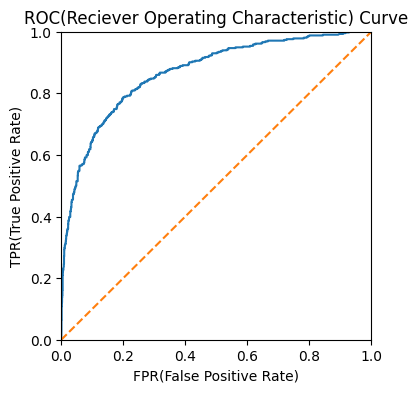

AUC-ROC score: 0.8675822870405905


In [36]:
probabilities_test = model_forest.predict_proba(features_test_df)
probabilities_one_test = probabilities_test[:,1]

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure(figsize=(4,4))
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel('FPR(False Positive Rate)')
plt.ylabel('TPR(True Positive Rate)')
plt.title('ROC(Reciever Operating Characteristic) Curve')

plt.show()

auc_roc = roc_auc_score(target_test, probabilities_one_test)
print(f"AUC-ROC score: {auc_roc}")


Description: The AUC ROC score is above the threshold of 0.5 and the curve looks good. 

# Conclusion 

The aim of the project was to produce a classification model that would predict whether or not Beta Bank customers would leave in the near future. The data was split into features,targets, then split into training,validation and testing sets. Then to encode and standardize the features in ways appropraite to the model that were trained. The Logistic regression model required one hot encoding, whereas the decison tree and random forest model required label encoding. Eventually, the classes were balanced and the best performing model was the random forest model based on it's F1 score. The requirement for the F1 score was 0.59 and this model generated a F1 score of 0.61 when trained.In addition this model had a AUC-ROC score of 0.86 which passes the sanity check. The only disadvantage about this model is the processing time. 